In [1]:
import random
import time
import numpy as np
rng = np.random.default_rng()
import math
import sys
from numpy import linalg as LA


In [2]:

def fun(X):
    output = sum(np.square(X))
    return output

# This function is to initialize the Honey Badger population.
def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random()*(ub[j] - lb[j]) + lb[j]
    return X

# Calculate fitness values for each Honey Badger.
def CaculateFitness1(X,fun):
    fitness = fun(X)
    return fitness

# Sort fitness.
def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness,index


# Sort the position of the Honey Badger according to fitness.
def SortPosition(X,index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i,:] = X[index[i],:]
    return Xnew


# Boundary detection function.
def BorderCheck1(X,lb,ub,dim):
        for j in range(dim):
            if X[j]<lb[j]:
                X[j] = ub[j]
            elif X[j]>ub[j]:
                X[j] = lb[j]
        return X
def Intensity(pop,GbestPositon,X):
  epsilon = 0.00000000000000022204
  di = np.zeros(pop)
  S = np.zeros(pop)
  I = np.zeros(pop)
  for j in range(pop):
    if (j <= pop):
      di[j]=LA.norm([[X[j,:]-GbestPositon+epsilon]])
      S[j]= LA.norm([X[j,:]-X[j+1,:]+epsilon])
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)
    else:
      di[j]=[ LA.norm[[X[pop,:]-GbestPositon+epsilon]]]
      S[j]=[LA.norm[[X[pop,:]-X[1,:]+epsilon]]]
      di[j] = np.power(di[j], 2)
      S[j]= np.power(S[j], 2)    
  
    for i in range(pop):
      n = random.random()
      I[i] = n*S[i]/[4*math.pi*di[i]]
    return I

In [3]:

def hba(pop,dim,lb,ub,Max_iter,fun):
    X = initial(pop, dim, lb,ub)                    # Initialize the number of honey badgers
    fitness = np.zeros([pop, 1])
    for i in range(pop):
      fitness[i] = CaculateFitness1(X[i, :], fun)
    fitness, sortIndex = SortFitness(fitness)       # Sort the fitness values of honey badger.
    X = SortPosition(X, sortIndex)                  # Sort the honey badger.
    GbestScore = fitness[0]                         # The optimal value for the current iteration.
    GbestPositon = np.zeros([1, dim])
    GbestPositon[0, :] = X[0, :]
    Curve = np.zeros([Max_iter, 1])
    C = 2                                          # constant in Eq. (3)
    beta = 6                                       # the ability of HB to get the food  Eq.(4)
    vec_flag=[1,-1]
    vec_flag=np.array(vec_flag)
    Xnew = np.zeros([pop, dim])
    for t in range(Max_iter):
        #print("iteration: ",t)
        alpha=C*math.exp(-t/Max_iter);             # density factor in Eq. (3)
        I=Intensity(pop,GbestPositon,X);           # intensity in Eq. (2)
        Vs=random.random()
        for i in range(pop):
          Vs=random.random()
          F=vec_flag[math.floor((2*random.random()))]
          for j in range(dim):
            di=GbestPositon[0,j]-X[i,j]
            if (Vs <0.5):                           # Digging phase Eq. (4)
              r3=np.random.random()
              r4=np.random.randn()
              r5=np.random.randn()
              Xnew[i,j]=GbestPositon[0,j] +F*beta*I[i]* GbestPositon[0,j]+F*r3*alpha*(di)*np.abs(math.cos(2*math.pi*r4)*(1-math.cos(2*math.pi*r5)));
            else:
              r7=random.random()
              Xnew[i,j]=GbestPositon[0,j]+F*r7*alpha*di;    # Honey phase Eq. (6)
          #print(di)
          Xnew[i,:] = BorderCheck1(Xnew[i,:], lb, ub, dim)
          tempFitness = CaculateFitness1(Xnew[i,:], fun)
          if (tempFitness <= fitness[i]):
            fitness[i] = tempFitness               
            X[i,:] = Xnew[i,:] 
        for i in range(pop):                         
          X[i,:] = BorderCheck1(X[i,:], lb, ub ,dim)
        Ybest,index = SortFitness(fitness)               # Sort fitness values.
        if (Ybest[0] <= GbestScore):                          
          GbestScore = Ybest[0]     # Update the global optimal solution.
          GbestPositon[0, :] = X[index[0], :]           # Sort fitness values 
        Curve[t] = GbestScore
    return GbestScore,GbestPositon,Curve


In [4]:

rng = np.random.default_rng()
time_start = time.time()
pop = 50                    # Honey Badger population size.
MaxIter = 300               # Maximum number of iterations.
dim = 20                    # The dimension.
fl=-10                    # The lower bound of the search interval.
ul=10                      # The upper bound of the search interval.
lb = fl*np.ones([dim, 1])
ub = ul*np.ones([dim, 1])
GbestScore, GbestPositon, Curve = hba(pop, dim, lb, ub, MaxIter, fun)
time_end = time.time()
print(f"The running time is: {time_end  - time_start } s")
print('The optimal value：',GbestScore)
print('The optimal solution：',GbestPositon)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


The running time is: 4.540382385253906 s
The optimal value： [3.58991313e-24]
The optimal solution： [[-5.18595217e-13 -5.37456319e-13  3.38781804e-13 -1.78341468e-13
  -3.67165970e-13  8.27261815e-14 -8.16415274e-13  3.79026533e-13
   4.77108362e-13 -3.15104461e-14 -1.84400922e-13 -2.60842549e-13
   1.04806686e-12  4.03983079e-13  1.25790814e-13 -6.15428789e-14
   1.92345587e-14  5.35001412e-13  1.74569857e-13  6.84711527e-14]]


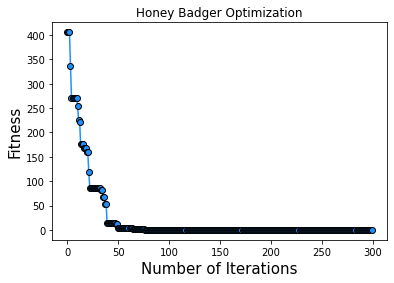

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot( Curve,color='dodgerblue', marker='o', markeredgecolor='k', markerfacecolor='dodgerblue')

ax.set_xlabel('Number of Iterations',fontsize=15)
ax.set_ylabel('Fitness',fontsize=15)
ax.set_title('Honey Badger Optimization')
plt.show()

